In [311]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import expit

import matplotlib.pyplot as plt
import numpy as np

In [312]:
with open("data") as datafile:
    data = [line.split() for line in datafile]

In [313]:
for i in range(len(data)):
    data[i][0] = float(data[i][0])
    data[i][1] = float(data[i][1])
    data[i][2] = float(data[i][2])
    data[i][3] = float(data[i][3])

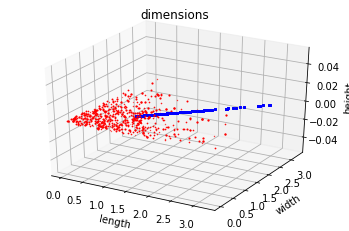

In [314]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

for i in range(len(data)):
    box = data[i]
    color = "r"
    m = "o"
    if box[3] == 1:
        color = "b"
        m = "s"
    plt.scatter(box[0], box[1], box[2], c = color, marker = m)

ax.set_xlabel("length")
ax.set_ylabel("width")
ax.set_zlabel("height")
plt.title("dimensions")
plt.show()

In [321]:
global w1
global w2
global w3
global b

global r8
global errors

r8 = .001

errors = []

In [322]:
w1 = np.random.randn()
w2 = np.random.randn()
w3 = np.random.randn()
b = np.random.randn()

In [323]:
print(w1)
print(w2)
print(w3)
print(b)

3.2725619541146447
1.7350516108961345
-0.37752414584089355
-0.2625932701037334


In [324]:
for i in range(10000):
    
    # get random element from data
    box = data[np.random.randint(len(data))]
    target = box[3]
    
    # set length to width, width to height and length to height ratio
    lw = np.abs(1 - (box[0] / box[1]))
    wh = np.abs(1 - (box[1] / box[2]))
    lh = np.abs(1 - (box[0] / box[2]))
    
    z = w1 * lw + w2 * wh + w3 * lh + b
    pred = expit(z) # prediction = sigmoid(z)
    error = (pred - target) ** 2
    
    # derivatives
    derror_pred = 2 * (pred - target)
    
    dpred_z = pred * (1 - pred)
    
    dz_w1 = lw
    dz_w2 = wh
    dz_w3 = lh
    dz_b = 1
    
    derror_w1 = derror_pred * dpred_z * dz_w1
    derror_w2 = derror_pred * dpred_z * dz_w2
    derror_w3 = derror_pred * dpred_z * dz_w3
    derror_b = derror_pred * dpred_z * dz_b
    
    # make changes to weights and bias
    w1 -= r8 * derror_w1
    w2 -= r8 * derror_w2
    w3 -= r8 * derror_w3
    b -= r8 * derror_b
    
    errors.append(error)

In [325]:
print(w1)
print(w2)
print(w3)
print(b)

3.0796646134501557
1.475979848043891
-0.7665807159411199
0.39706448732979677


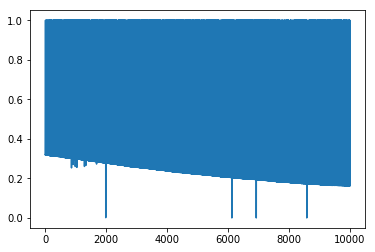

In [326]:
plt.plot(errors)

In [242]:
def test(l, w, h):
    prediction = expit(w1 * np.abs(1 - (l / w)) + w2 * np.abs(1 - (l / h)) + w3 * np.abs(1 - (w / h)) + b)
    print("Prediction of this test: " + str(prediction))
    if prediction >= .5:
        print("Box: " + str(l) + "m x " + str(w) + "m x " + str(h) + "m is close to being a cube.")
    else:
        print("Box: " + str(l) + "m x " + str(w) + "m x " + str(h) + "m is not a cube.")

In [292]:
test(3.0, 3.0, 3.0)
test(3.0, 3.1, 2.9)
test(3.05, 3.1, 2.95)
test(3.0, 2.9, 3.2)
test(2.8, 3.2, 3.0)
test(3, 3, 3.5)

Prediction of this test: 0.9065010958228212
Box: 3.0m x 3.0m x 3.0m is close to being a cube.
Prediction of this test: 0.8426612656564341
Box: 3.0m x 3.1m x 2.9m is close to being a cube.
Prediction of this test: 0.861592369855065
Box: 3.05m x 3.1m x 2.95m is close to being a cube.
Prediction of this test: 0.8082579471915815
Box: 3.0m x 2.9m x 3.2m is close to being a cube.
Prediction of this test: 0.7786932094817401
Box: 2.8m x 3.2m x 3.0m is close to being a cube.
Prediction of this test: 0.7317901283972283
Box: 3m x 3m x 3.5m is close to being a cube.
